In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
updrs1_cat_df = pd.read_csv('../data/processed/train_updrs_1_cat.csv')
updrs2_cat_df = pd.read_csv('../data/processed/train_updrs_2_cat.csv')
updrs3_cat_df = pd.read_csv('../data/processed/train_updrs_3_cat.csv')

In [16]:
updrs1_cat_df.head()

,visit_id,patient_id,visit_month,updrs_1,O00391,O00533,O00584,O14498,O14773,O14791,...,YVNKEIQNAVNGVK_P10909,YWGVASFLQK_P02753,YYC(UniMod_4)FQGNQFLR_P02790,YYTYLIMNK_P01024,YYWGGQYTWDMAK_P02675,kfold,num_prot_pep,num_prot,num_pept,updrs_1_cat
0,15009_6,15009,6,10.0,8405.07,534045.0,30143.1,20820.7,11807.80,0.00,...,61756.0,120733.0,471637.0,34750.8,13215.8,0,1.105130e+09,5.525650e+08,5.525647e+08,mild
1,34182_72,34182,72,7.0,0.00,542513.0,19304.5,22916.5,6747.55,4420.99,...,75484.3,98472.8,326149.0,32177.8,27313.8,0,8.682514e+08,4.341258e+08,4.341257e+08,mild
2,23175_48,23175,48,3.0,11009.60,307536.0,16775.6,16795.3,10865.30,2884.05,...,99610.6,182655.0,420676.0,40307.4,18854.4,0,1.110041e+09,5.550206e+08,5.550202e+08,mild
3,55256_12,55256,12,3.0,10321.10,662077.0,40133.5,36077.4,38053.20,0.00,...,112250.0,198959.0,517531.0,47780.1,13218.4,0,1.435929e+09,7.179644e+08,7.179644e+08,mild
4,64674_6,64674,6,11.0,0.00,274549.0,21607.1,13334.7,15174.40,2240.71,...,45884.6,103051.0,735200.0,61510.1,22546.5,0,1.117004e+09,5.585019e+08,5.585018e+08,moderate


In [17]:
# replace the categorical mild with 0, and moderate and severe with 1
updrs1_cat_df['updrs_1_cat'] = updrs1_cat_df['updrs_1_cat'].map({'mild':0, 'severe':1, 'moderate':1})
updrs2_cat_df['updrs_2_cat'] = updrs2_cat_df['updrs_2_cat'].map({'mild':0, 'severe':1, 'moderate':1})
updrs3_cat_df['updrs_3_cat'] = updrs3_cat_df['updrs_3_cat'].map({'mild':0, 'severe':1, 'moderate':1})

In [18]:
# assign the max updrs category to the patient
def max_updrs_cat(df, target):
    
    max_updrs = df.groupby('patient_id')[target].max().reset_index()
    max_updrs = max_updrs.rename(columns={target:f'max_{target}'})
    final_df = df.merge(max_updrs, how='left', on='patient_id')
    
    return final_df

In [19]:
updrs1_cat_df = max_updrs_cat(updrs1_cat_df, 'updrs_1_cat')
updrs2_cat_df = max_updrs_cat(updrs2_cat_df, 'updrs_2_cat')
updrs3_cat_df = max_updrs_cat(updrs3_cat_df, 'updrs_3_cat')


In [20]:
updrs1_cat_df.head()

,visit_id,patient_id,visit_month,updrs_1,O00391,O00533,O00584,O14498,O14773,O14791,...,YWGVASFLQK_P02753,YYC(UniMod_4)FQGNQFLR_P02790,YYTYLIMNK_P01024,YYWGGQYTWDMAK_P02675,kfold,num_prot_pep,num_prot,num_pept,updrs_1_cat,max_updrs_1_cat
0,15009_6,15009,6,10.0,8405.07,534045.0,30143.1,20820.7,11807.80,0.00,...,120733.0,471637.0,34750.8,13215.8,0,1.105130e+09,5.525650e+08,5.525647e+08,0,0
1,34182_72,34182,72,7.0,0.00,542513.0,19304.5,22916.5,6747.55,4420.99,...,98472.8,326149.0,32177.8,27313.8,0,8.682514e+08,4.341258e+08,4.341257e+08,0,1
2,23175_48,23175,48,3.0,11009.60,307536.0,16775.6,16795.3,10865.30,2884.05,...,182655.0,420676.0,40307.4,18854.4,0,1.110041e+09,5.550206e+08,5.550202e+08,0,0
3,55256_12,55256,12,3.0,10321.10,662077.0,40133.5,36077.4,38053.20,0.00,...,198959.0,517531.0,47780.1,13218.4,0,1.435929e+09,7.179644e+08,7.179644e+08,0,0
4,64674_6,64674,6,11.0,0.00,274549.0,21607.1,13334.7,15174.40,2240.71,...,103051.0,735200.0,61510.1,22546.5,0,1.117004e+09,5.585019e+08,5.585018e+08,1,1


## What is the distribution of visit_months?

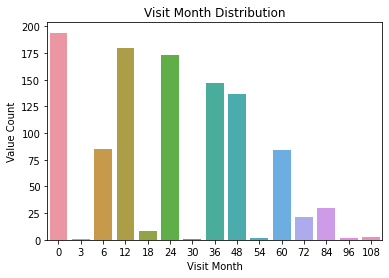

In [21]:
visit_month_dist = updrs1_cat_df['visit_month'].value_counts().reset_index()
visit_month_dist.columns = ['visit_month', 'value_count']
visit_month_dist = visit_month_dist.sort_values(by='visit_month')
sns.barplot(data=visit_month_dist, x='visit_month', y='value_count')
plt.title('Visit Month Distribution')
plt.xlabel('Visit Month')
plt.ylabel('Value Count')
plt.show()

## What % of the max updrs categories happening within visit_month 12

In [22]:
first_twelve_updrs1 = updrs1_cat_df[updrs1_cat_df['visit_month'] <= 12]
first_twelve_updrs2 = updrs2_cat_df[updrs2_cat_df['visit_month'] <= 12]
first_twelve_updrs3 = updrs3_cat_df[updrs3_cat_df['visit_month'] <= 12]

In [23]:
max_first_twelve_df1 = first_twelve_updrs1[first_twelve_updrs1['updrs_1_cat'] == first_twelve_updrs1['max_updrs_1_cat']]
max_first_twelve = max_first_twelve_df1['patient_id'].nunique()
all_first_twelve = first_twelve_updrs1['patient_id'].nunique()
print(f'For UPDRS 1, {round(100 * max_first_twelve / all_first_twelve, 2)}% of patients hit their max category in the first twelve months')

For UPDRS 1, 84.84% of patients hit their max category in the first twelve months


In [24]:
max_first_twelve_df2 = first_twelve_updrs2[first_twelve_updrs2['updrs_2_cat'] == first_twelve_updrs2['max_updrs_2_cat']]
max_first_twelve = max_first_twelve_df2['patient_id'].nunique()
all_first_twelve = first_twelve_updrs2['patient_id'].nunique()
print(f'For UPDRS 2, {round(100 * max_first_twelve / all_first_twelve, 2)}% of patients hit their max category in the first twelve months')

For UPDRS 2, 86.48% of patients hit their max category in the first twelve months


In [25]:
max_first_twelve_df3 = first_twelve_updrs3[first_twelve_updrs3['updrs_3_cat'] == first_twelve_updrs3['max_updrs_3_cat']]
max_first_twelve = max_first_twelve_df3['patient_id'].nunique()
all_first_twelve = first_twelve_updrs3['patient_id'].nunique()
print(f'For UPDRS 3, {round(100 * max_first_twelve / all_first_twelve, 2)}% of patients hit their max category in the first twelve months')

For UPDRS 3, 82.38% of patients hit their max category in the first twelve months


## Are those mostly the ones that just stay mild?

In [34]:
max_first_twelve_df1.groupby(['patient_id'])['max_updrs_1_cat'].max().value_counts() / updrs1_cat_df.groupby(['patient_id'])['max_updrs_1_cat'].max().value_counts()

0    0.974684
1    0.588889
Name: max_updrs_1_cat, dtype: float64

In [37]:
max_first_twelve_df2.groupby(['patient_id'])['max_updrs_2_cat'].max().value_counts() / updrs2_cat_df.groupby(['patient_id'])['max_updrs_2_cat'].max().value_counts()

0    0.978022
1    0.500000
Name: max_updrs_2_cat, dtype: float64

In [38]:
max_first_twelve_df3.groupby(['patient_id'])['max_updrs_3_cat'].max().value_counts() / updrs3_cat_df.groupby(['patient_id'])['max_updrs_3_cat'].max().value_counts()

0    0.981818
1    0.469880
Name: max_updrs_3_cat, dtype: float64